# Intro to PyTorch (Technically A Numpy Replacement)
The functionality of PyTorch is very similar to Numpy with two exceptions:
- Ability to move tensors onto a GPU

- Automatic differentiation engine that powers Neural Networks

We will first be studying the functionalty of PyTorch and how we can use it to manipulate tensors as we do in Numpy

## Prerequisites for this notebook
- Python Programming
    - Classes (just the basics)
    - Numpy
    - For Loops
 
## What do you need for Deep Learning?
- **Must Know**
    - Linear Algebra
    - Calculus
    - Probability and Statistics
    - Optimization


- **Nice to Know**
    - Toplogy
    - Graph Theory 
    - Partial Differential Equations
    - Any knowledge you can get your hands on!
        - Diffusion Models leverage concepts from Thermodynamics


## What is a Tensor?

Generally we arrange data into rows and columns, such as a CSV file or a grid that represents an image. These can be thought of as 2 dimensions, where data is represented along two axis.

A lot of real world datasets though cannot be represented as such and require a higher number of dimensions. For example, and we will be studying this a lot later, lets think about color images. 

### Color Image
To humans, we see colors as red, green, blue, etc... but this is not the case for computers. A computer has to represent an image as an array of numbers (pixel values). Black and white images are relatively simple, and can be represented with a single channel (a single height x width array).

When we go to color images though, you may have heared of RGB, where the colors we see are a mixture of Red, Green, and Blue color levels. In this case we have 3 channels, a single height x width array for each channel, therefore giving us a dimension of (3 x height x width). Now that we have a 3d matrix, we call this a tensor

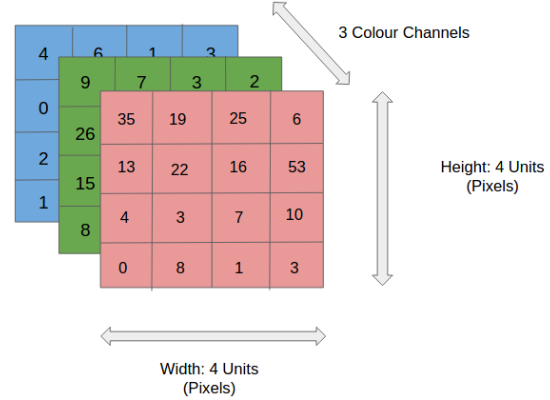

credit: https://towardsdatascience.com/convolution-neural-network-for-image-processing-using-keras-dc3429056306


### Creating Tensors
Let's try to create some tensors from data we input




In [1]:
### IMPORTS ###
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import time
import matplotlib.pyplot as plt


In [2]:
data = [1.0, 2.0, 3.0]
tensor = torch.Tensor(data)
print("Example with 1-D data")
print(tensor)

# Example with 2-D data
data = [[1., 2., 3.], [4., 5., 6]]
tensor = torch.Tensor(data)
print("\nExample with 2-D data")
print(tensor)

Example with 1-D data
tensor([1., 2., 3.])

Example with 2-D data
tensor([[1., 2., 3.],
        [4., 5., 6.]])


# Generate Random Tensors

In [3]:
rand = torch.randn(2,3,3)
rand

tensor([[[-0.9071,  0.9432,  1.5013],
         [ 0.1537,  0.6934, -1.1295],
         [-0.5507,  0.6315, -0.6359]],

        [[-1.6563,  0.1158,  2.2193],
         [-0.6130,  0.3391, -0.6442],
         [-0.1430, -0.1833, -0.9412]]])

## AutoGrad: The Power of PyTorch
Everything we have seen so far can be replicated in Numpy in the same fashion.What makes PyTorch unique is that when doing calculations on a tensor, it will keep track of what was done to then calculate derivatives. The reason its important to keep track of this is to make Backpropagation as efficient as possible. 

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it **starts to track all operations on it**. When
you finish your computation you can call ``.backward()`` and have **all the
gradients computed automatically**. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To **stop a tensor from tracking history**, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To **prevent tracking history (and using memory)**, you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with `requires_grad=True`,
but for which we don't need the gradients.

Let us consider a complete example now where x = 1

$$f(x) = 3*(x + 2)^2$$


We can then calculate the derivative (with respect to x)

$$f'(x) = 6*(x + 2)$$

$$f'(1) = 6*(1 + 2) = 18$$

In [4]:
x = torch.ones(2,2, requires_grad=True)
y = x + 2
z = y**2 * 3
z = z.mean()

z.backward()
print("Averagae Gradient")
print(x.grad)

Averagae Gradient
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## Linear Regression? Why Bother?

![image](https://miro.medium.com/max/1400/1*Nf2tTTkALYq6RTMQmhjo1A.png)

creidt: https://pub.towardsai.net/linear-regression-basics-for-absolute-beginners-68ed9ff980ae

We will start with a super simple linear regression problem to demo how deep learning and pytorch works. In this example we will have one input variable and one output variable, so our formula will look like this! (You should recognize this from before)

$$ y = w_0 + w_1*x_1$$

### Optimizing What Exactly?
$$\frac{1}{N}\sum_{i=1}^{n}(y - \hat{y})^2$$


### Linear Regression has a Closed Form Solution
$$W = \begin{bmatrix} w_0 \\ w_1 \\  \vdots \end{bmatrix} = (X^TX)^{-1}X^Ty$$



### Lets Double Check Scikit Learn



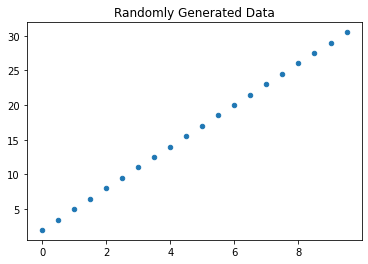

In [5]:
X = np.arange(0, 10, 0.5)
epsilon = np.random.normal(0, 1, len(X))
y = (2 + 3*X)

plt.scatter(X, y, s=20)
plt.title("Randomly Generated Data")
plt.show()

In [6]:
X, y = X.reshape(-1,1), y.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)
print("W_1:", model.coef_[0][0])
print("W_0:", model.intercept_[0])

W_1: 3.0000000000000004
W_0: 1.9999999999999982


## How about Pytorch?

The Pytorch Model Class has two main things you need to implement:
```
__init__: All your functions are initialized here

super().__init__(): You need to initialize the inherited Class

forward: How will you pass your data through?
```
### What does this "Neural Network" Look like?
![image](SLR.png)

### What is Gradient Descent?
![image](https://sebastianraschka.com/images/faq/gradient-optimization/ball.png)
credit: https://sebastianraschka.com/faq/docs/gradient-optimization.html

In [7]:
torch.seed()

class SGDRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
    
    def forward(self, x):
        y = self.fc1(x)
        return y

model = SGDRegression()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
EPOCHS = 5000

X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

In [8]:
# Take a look at current parameters
for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[0.5983]], requires_grad=True)
fc1.bias Parameter containing:
tensor([0.7333], requires_grad=True)


In [9]:
for epoch in range(EPOCHS):
    ### PASS DATA THROUGH MODEL ###
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    ### OPTIMIZE MODEL ###
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print Gradient
#     print(loss)
#     print(model.fc1.weight.grad)

    
print(loss)

tensor(4.4406e-11, grad_fn=<MseLossBackward0>)


In [10]:
# What is our weight and bias now?
for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[3.0000]], requires_grad=True)
fc1.bias Parameter containing:
tensor([2.0000], requires_grad=True)


## Dense MNIST Deep Learning Model
Mnist is a common starting dataset as is relatively simple to predict. This dataset is handwritten digits from 0-9 and our goal is to predict the digit given an image. Lets start by loading our needed packages and seeing some examples of these digits. 

In [11]:
### LOAD DATA ###
train = torchvision.datasets.MNIST('', train=True, download=True,
                      transform=transforms.Compose([ ### CONVERT ARRAY TO TENSOR
                          transforms.ToTensor()
                       ]))

test = torchvision.datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


Image Label: 5


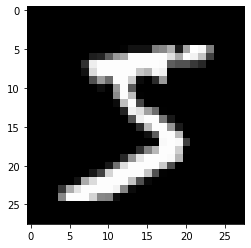

Image Label: 0


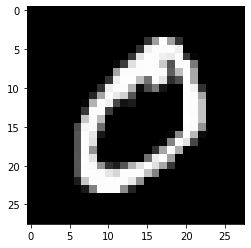

Image Label: 4


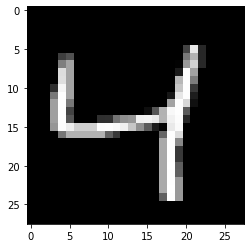

Image Label: 1


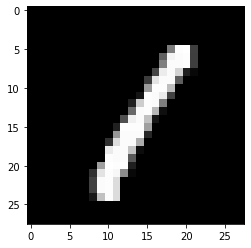

Image Label: 9


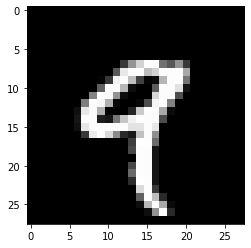

Image Label: 2


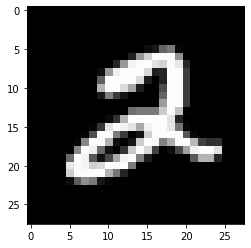

In [12]:
counter = 0
for image, label in train:
    if counter == 6:
        break
    image = image.squeeze().numpy()
    print("Image Label:", label)
    plt.imshow(image, cmap="gray")
    plt.show()
    counter += 1



# Neural Network Considerations
When building a Neural Network there are a few things we have to consider:
- **Batch Size:** How many samples do we want to feed through the network at every step?
  - Too large a batch size and we wont be able to fit our data in Memory
  - Too small a batch size, our model wont see a wide enough range of data every time to generalize properly

- **Optimizer:** How will be descend our Cost Curve? The most common optimizer is **Adam** but different problems can benifit from a different optimizer

- **Loss Function:** How do we calculate error? This is highly dependent on the problem! Is it a regression or classification, how many classes do we have, etc...

- **EPOCHS:** How many passes do we want through the entire data? Too few passes and the model will not have learned the weights (Underfitting), too many and the model will have memorized the data (Overfitting)

- **LR:** How quickly do we want to learn? Too fast will be unstable, but too slow will cause training to take more time than necessary 


## Overfitting/Underfitting
![image](https://1.cms.s81c.com/sites/default/files/2021-03-03/model-over-fitting.png)
credit: https://www.ibm.com/cloud/learn/overfitting

## Activation Functions
![image](https://miro.medium.com/max/1400/1*ZafDv3VUm60Eh10OeJu1vw.png)
credit: https://medium.com/@shrutijadon/survey-on-activation-functions-for-deep-learning-9689331ba092

Lets define some of these below as our starting point

In [13]:
BATCH_SIZE = 128
LOSS = nn.CrossEntropyLoss() # We use CrossEntropy for multi-class classification problems
LR = 0.008
EPOCHS = 5

### Build Dataloaders with correct Batch Size ###
trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testset = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

## Build Simple Dense Network
A dense network only uses fully connected layers (we will look at a more complex architecure next)

![image](https://miro.medium.com/max/1400/1*VHOUViL8dHGfvxCsswPv-Q.png)


credit: https://medium.com/swlh/fully-connected-vs-convolutional-neural-networks-813ca7bc6ee5

Components of a PyTorch Neural Network Architecutre
- ``__init__()``: This is where we declare the exact specifications of every layer we want in our Neural Network
- ``forward()``: This is where we explicitly state the path our input data will take through our declared layers in the init


### From Logits to Probability: Softmax!
For each class in our output, we don't care about the raw outputs, we want probabilities

$$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$


In [14]:
class FCNet(nn.Module): # Inherit in nn.Module Class
    def __init__(self):
        super().__init__() # initialize the nn.Module Class
        self.fc1 = nn.Linear(28*28, 64) # input flattened 28*28 into 64 node layer
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # Output to 10 neurons as we have 10 options
        
    def forward(self, x):
        """
        Activation Function: ReLU
        """
        x = x.view(-1, 28*28) # reshape to flaten our batch*28*28 to be batch*784
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
#     x = F.log_softmax(self.fc4(x), dim=1) This is wrong, our loss expectects logits not probabilities
        x = self.fc4(x)
        return x

## Training Loop 
Unlike some other Deep Learning Frameworks, in PyTorch we have to write our own code for the training loop. Although this is more work, we can customize quite a bit how we want to train our model

In [15]:
# Declare Model
model = FCNet()
# Declare Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=LR)

start = time.time()
for epoch in range(1, EPOCHS+1):
    print("Epoch {}".format(epoch))
    losses = []
    for data in trainset:
        X, y = data
        optimizer.zero_grad() # We want to zero the gradient before every forward pass
        forward_out = model(X)
        loss_val = LOSS(forward_out, y)
        losses.append(loss_val.item())
        loss_val.backward() # Calculate Gradients
        optimizer.step() # Take a step towards optimizing

    print(f"Loss: {np.mean(losses)}")

print("Time On CPU for Model Training: {}".format(time.time() - start))

Epoch 1
Loss: 0.3090754923686735
Epoch 2
Loss: 0.1449618887013273
Epoch 3
Loss: 0.11443363986750528
Epoch 4
Loss: 0.09776231469804926
Epoch 5
Loss: 0.08951162954649405
Time On CPU for Model Training: 282.8464195728302


In [16]:
correct = 0
total = 0

model.eval()

with torch.no_grad(): # Do not update weights with test data
    for data in testset:
        X, y = data
        forward_out = model(X)
        
        for idx, i in enumerate(forward_out):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.96


## Recap

And just like that we have 95% Accuracy! This means that given an image of a number, we can detect the number more than 95% percent of the time. 

Do keep in mind though, accuracy is not the only metric we should look at, and how you define a good model can be problem dependent

## GPU Acceleration
This was a great example to get you started but we have a small issue, the training took about 60 seconds (this can change depending on where we ran it). This is also a relatively simple dataset with small images, and not too many samples. What if we have a massive dataset? How can we train our model in any meaningful way?

The process is identical, but lets move our training off of the CPU and onto a GPU (which are very good at doing linear algebra computations)

In PyTorch, a GPU is indicated by "cuda" and to move a model or tensor to the gpu all you have to do is ``.to("cuda")``

In this case we may not see a huge improvement because out dataset was not complex and our model is pretty simple as well, but this will become more important as we build larger models


## More Complex Acceleration
- DataParallel
- Distributed DataParallel

In [17]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Training Model on {DEVICE}")

!nvidia-smi

Training Model on cuda
Wed Sep 28 09:30:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000004:04:00.0 Off |                    0 |
| N/A   32C    P0    36W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                 

In [18]:
# Declare Model
model = FCNet().to(DEVICE)
# Declare Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=LR)

start = time.time()
for epoch in range(1, EPOCHS+1):
    print("Epoch {}".format(epoch))
    losses = []
    for data in trainset:
        X, y = data
        X, y = X.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad() # We want to zero the gradient before every forward pass
        forward_out = model(X)
        loss_val = LOSS(forward_out, y)
        losses.append(loss_val.item())
        loss_val.backward() # Calculate Gradients
        optimizer.step() # Take a step towards optimizing
        
    print(f"Loss: {np.mean(losses)}")

print("Time On GPU for Model Training: {}".format(time.time() - start))

Epoch 1
Loss: 0.2919961559905935
Epoch 2
Loss: 0.13775162451239284
Epoch 3
Loss: 0.10978886490461351
Epoch 4
Loss: 0.09654385355342902
Epoch 5
Loss: 0.08001394963948362
Time On GPU for Model Training: 22.137059688568115


# WAIT DOESNT SPATIAL INFORMATION MATTER? #

## Convolutions to the rescue!

![image](https://miro.medium.com/max/4800/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

credit: https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

## How Convolutions Slide 
![image](https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif)

credit:https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

## Parameters for Convolutions
- in_channels: Number of channels in the input tensor
- out_channels: Wanted number of channels in the output tensor
- kernel_size: Size of the filter
- stride=1 : How many steps to move in each iteration
- padding=0: How much border we want to add to image


## What is a filter? Lets take a look at the Sobel Filter
![image](https://miro.medium.com/max/1400/1*4lPMjSPaS2JLWZAaYrXr2Q.jpeg)

![image](https://miro.medium.com/max/910/1*NTuG456VXhSh7X-mhekP4A.gif)


credit: https://medium.datadriveninvestor.com/understanding-edge-detection-sobel-operator-2aada303b900

## Image Transforms: Data Augmentation to battle small-data and overfitting
- RandomFlip
- RandomRotation
- Random Gaussian Blur
- Random Crops
- Solarize
- Invert
- Color Jitter

In [19]:
# What are all the available transformations?
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [20]:
train_transforms = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.RandomVerticalFlip(p=0.5),
                                       transforms.ToTensor()])

train = torchvision.datasets.MNIST('', train=True, download=True,
                      transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = torchvision.datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [21]:
BATCH_SIZE = 128
LOSS = nn.CrossEntropyLoss() # We use CrossEntropy for multi-class classification problems
LR = 0.008
EPOCHS = 5

### Build Dataloaders with correct Batch Size ###
trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testset = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

## How do you handle shapes with convolutions?
We can calculate the output image size if we know the parameters of the convolution applied to it

$$\frac{width - kernelsize + 2*padding}{stride} + 1$$

We can technically calculate this recursively but there are easier ways

In [22]:
### LETS BUILD A CONVOLUTIONAL NN ###
class MNISTCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.fc3 = nn.Linear(20*24*24, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 20*24*24)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    


In [23]:
### DYNAMIC INPUT MODEL ###
class DYNAMICMNISTCNN(nn.Module):
    def __init__(self, input_shape=(1,28,28)):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        
        self.linear_flatten = None
        if self.linear_flatten is None:
            dummy = torch.zeros(2, *input_shape) # use atleast two, batchnorm will be upset
            with torch.no_grad():
                dummy_out = self.convolutions(dummy)
                self.linear_flatten = np.prod(dummy_out.shape[1:])
        
        self.fc3 = nn.Linear(self.linear_flatten, 64)
        self.fc4 = nn.Linear(64, 10)
            
    def convolutions(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x
    
    def forward(self, x):
        x = self.convolutions(x)
        x = x.view(-1, self.linear_flatten)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
        

In [24]:
model = MNISTCNN()
dyn_model = DYNAMICMNISTCNN()

print(model)
print(dyn_model)

MNISTCNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc3): Linear(in_features=11520, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
DYNAMICMNISTCNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc3): Linear(in_features=11520, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [25]:
# Declare Model
model = DYNAMICMNISTCNN().to(DEVICE)
# Declare Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=LR)

start = time.time()
for epoch in range(1, EPOCHS+1):
    print("Epoch {}".format(epoch))
    losses = []
    for data in trainset:
        X, y = data
        X, y = X.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad() # We want to zero the gradient before every forward pass
        forward_out = model(X)
        loss_val = LOSS(forward_out, y)
        losses.append(loss_val.item())
        loss_val.backward() # Calculate Gradients
        optimizer.step() # Take a step towards optimizing
        
    print(f"Loss: {np.mean(losses)}")

print("Time for Model Training: {}".format(time.time() - start))

Epoch 1
Loss: 0.2829700086766215
Epoch 2
Loss: 0.08435166402777503
Epoch 3
Loss: 0.06309276457621789
Epoch 4
Loss: 0.04957460760519202
Epoch 5
Loss: 0.04553624248650394
Time for Model Training: 25.616623640060425


In [26]:
correct = 0
total = 0

model = model.to("cpu")
model.eval()

with torch.no_grad(): # Do not update weights with test data
    for data in testset:
        X, y = data
        forward_out = model(X)

        for idx, i in enumerate(forward_out):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.98


### Now what do I do with my model?

We can save and load it whenever we want!

In [27]:
### SAVE STATE DICT ###
torch.save(model.state_dict(), "/home/priyamm2/model_state_dict.pt")

model = DYNAMICMNISTCNN()
model.load_state_dict(torch.load("/home/priyamm2/model_state_dict.pt"))

<All keys matched successfully>

In [28]:
torch.save(model, "/home/priyamm2/model_full.pt")
model = torch.load("/home/priyamm2/model_full.pt")
model

DYNAMICMNISTCNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc3): Linear(in_features=11520, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

## Unsupervised Learning: Autoencoder

What if we don't have labels but want to still learn latent features? Incomes the autoenoder!
![image](https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)

credit: https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

## Why Autoencoders are possible for Vision: Transpose Convolutions
Convolutions Downscale images, Transpose Convolutions Upscale them
![image](https://miro.medium.com/max/1400/1*kOThnLR8Fge_AJcHrkR3dg.gif)

In [29]:
class AutoEncoder(nn.Module):
    def __init__(self, input_shape=(1, 28, 28), embedded_dim=16):
        super().__init__()
        self.input_shape = input_shape
        self.embedded_dim = embedded_dim
        
        ### ENCODER ###
        self.enc_conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=2)
        self.enc_bn1 = nn.BatchNorm2d(8)
        
        self.enc_conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=2)
        self.enc_bn2 = nn.BatchNorm2d(16)
        
        self.enc_conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=2)
        self.enc_bn3 = nn.BatchNorm2d(32)
        
        ### BOTTLENECK ###
        self.linear_flatten = None
        if self.linear_flatten is None:
            dummy = torch.zeros(2, *self.input_shape) # use atleast two, batchnorm will be upset
            with torch.no_grad():
                dummy_out = self.encoder_convolutions(dummy)
                self.linear_flatten = np.prod(dummy_out.shape[1:])
                self.unflatten = dummy_out.shape[1:]
        
        self.bn_fc1 = nn.Linear(self.linear_flatten, 64)
        self.bn_fc2 = nn.Linear(64, self.embedded_dim) # Bottleneck Layer
        self.bn_fc3 = nn.Linear(self.embedded_dim, 64)
        self.bn_fc4 = nn.Linear(64, self.linear_flatten)

        ### DECODER ###
        self.dec_conv1 = nn.ConvTranspose2d(self.unflatten[0], 16, kernel_size=3, stride=2, output_padding=1)
        self.dec_bn1 = nn.BatchNorm2d(16)
        
        self.dec_conv2 = nn.ConvTranspose2d(16, 8, kernel_size=3, stride=2, output_padding=1)
        self.dec_bn2 = nn.BatchNorm2d(8)
        
        self.dec_conv3 = nn.ConvTranspose2d(8, 1, kernel_size=3, stride=2, output_padding=0)
        
        
    def encoder_convolutions(self, x):
        x = F.relu(self.enc_bn1(self.enc_conv1(x)))
        x = F.relu(self.enc_bn2(self.enc_conv2(x)))
        x = F.relu(self.enc_bn3(self.enc_conv3(x)))
        return x
    
    def bottleneck(self, x):
        x = x.view(-1, self.linear_flatten)
        x = F.relu(self.bn_fc1(x))
        bottleneck = F.relu(self.bn_fc2(x))
        x = F.relu(self.bn_fc3(bottleneck))
        x = F.relu(self.bn_fc4(x))
        return x, bottleneck
    
    def decoder(self, x):
        x = x.view(-1, *self.unflatten)
        x = F.relu(self.dec_bn1(self.dec_conv1(x)))
        x = F.relu(self.dec_bn2(self.dec_conv2(x)))
        x = self.dec_conv3(x)
        x = x[..., :28, :28] # Clip off extra pixel
        return x
        
    
    def forward(self, x):
        x = self.encoder_convolutions(x)
        x, bottleneck = self.bottleneck(x)
        x = self.decoder(x)
        x = torch.sigmoid(x)
        return x, bottleneck

In [30]:
DEVICE = "cuda:0"
model = AutoEncoder(embedded_dim=16).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss = nn.MSELoss()
EPOCHS = 20

all_training_loss = []
all_validation_loss = []

for epoch in range(1, EPOCHS+1):
    training_loss = []
    validation_loss = []
    for data in trainset:
        X, _ = data
        X = X.to(DEVICE)
        optimizer.zero_grad() # We want to zero the gradient before every forward pass
        forward_out, bottleneck = model(X)
        loss_val = loss(forward_out, X)
        training_loss.append(loss_val.item())
        loss_val.backward() # Calculate Gradients
        optimizer.step() # Take a step towards optimizing
    
    for data in testset:
        X, _ = data
        X = X.to(DEVICE)
        with torch.no_grad():
            forward_out, bottleneck = model(X)
            loss_val = loss(forward_out, X)
            validation_loss.append(loss_val.item())

    training_loss, validation_loss = np.mean(training_loss), np.mean(validation_loss)
    
    print(f"Epoch [{epoch}]/[{EPOCHS}]: Training Loss: {training_loss}, Validation Loss: {validation_loss}")
    all_training_loss.append(training_loss)
    all_validation_loss.append(validation_loss)
            
    
    

Epoch [1]/[20]: Training Loss: 0.08822540374103385, Validation Loss: 0.03666073258353185
Epoch [2]/[20]: Training Loss: 0.02965880179011237, Validation Loss: 0.027172500762758376
Epoch [3]/[20]: Training Loss: 0.02472569841518204, Validation Loss: 0.024739417495040952
Epoch [4]/[20]: Training Loss: 0.022861327761526048, Validation Loss: 0.02331268459652798
Epoch [5]/[20]: Training Loss: 0.021822211366377152, Validation Loss: 0.022406894171351117
Epoch [6]/[20]: Training Loss: 0.02115250206482944, Validation Loss: 0.022026262540794626
Epoch [7]/[20]: Training Loss: 0.02064002081672393, Validation Loss: 0.022021540876808045
Epoch [8]/[20]: Training Loss: 0.020274036613576955, Validation Loss: 0.02139733514831036
Epoch [9]/[20]: Training Loss: 0.019962022120732743, Validation Loss: 0.021371998835968065
Epoch [10]/[20]: Training Loss: 0.019765425572739734, Validation Loss: 0.02099952096991901
Epoch [11]/[20]: Training Loss: 0.01947561255110098, Validation Loss: 0.02061450052299077
Epoch [1

In [31]:
embedded_samples, labels = [], []

model.eval()
for img, label in tqdm(test, total=len(test)):
    img = img.unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        _, embedded = model(img)
        
    embedded = np.array(embedded.squeeze().to("cpu"))
    embedded_samples.append(embedded)
    labels.append(label)


100%|██████████| 10000/10000 [00:13<00:00, 741.10it/s]


In [32]:
embedded_samples = np.array(embedded_samples)
labels = np.array(labels)

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(embedded_samples)

/home/priyamm2/.conda/envs/reu/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/priyamm2/.conda/envs/reu/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


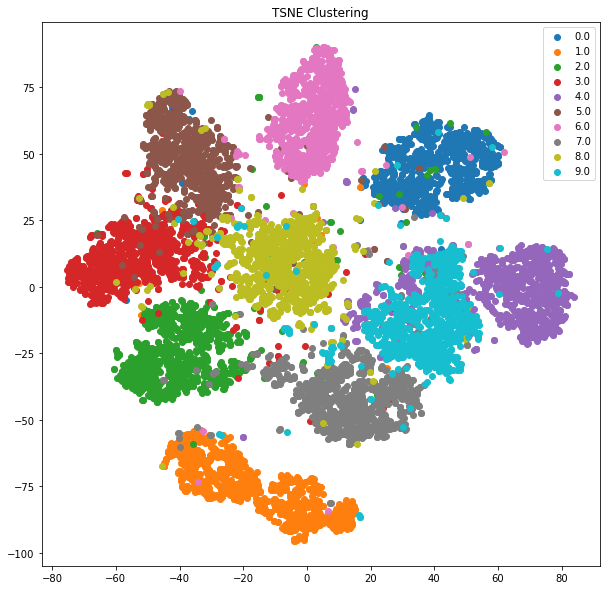

In [33]:
two_components = np.hstack((tsne_results, labels.reshape(-1, 1)))
two_components = pd.DataFrame(data=two_components)
two_components.columns = ["c1", "c2", "label"]

label_groups = two_components.groupby("label")

plt.figure(figsize=(10, 10))
for label, group in label_groups:
    plt.scatter(group["c1"], group["c2"], marker="o", label=label)

plt.legend()
plt.title("TSNE Clustering")
plt.show()



## What else exists in Deep Learning?

### Important Model Design Considerations
- BatchNormalization
- Pooling
- Dropout
- Regularization 
- Transpose Convolution
- Embedding Layers

### Some of the architectures and ideas that exist today
- RNN/LSTM
- Variational Autoencoders
- Reinforcement Learning
- Transformers/ Vision Transformers
- Graph Neural Networks
- Stable Diffusion
- Self-Organizing Maps
- Self-Supervised Pretraining
- Quantization
